In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/datamining/tugas/data/covid.csv")

In [ ]:
df

,Unnamed: 0,Datetime,Tweet Id,Text,Username,label
0,0,2022-02-21 23:59:59+00:00,1495911210067558403,"Alert: #England,#UK Scraps All #COVID-19 Restr...",WoRisGo_global,1
1,1,2022-02-21 23:59:59+00:00,1495911209106907139,The pandemic was essential to introducing the ...,jeffkav,1
2,2,2022-02-21 23:59:58+00:00,1495911205545914369,Bayern forward Muller tests positive for COVID...,iscorers,1
3,7,2022-02-21 23:59:52+00:00,1495911177356029966,@sky_dvr @Bilked2TheBrink @TNIrishLass On the ...,sexton_cecilia,1
4,9,2022-02-21 23:59:46+00:00,1495911152643198976,"Lol.... ""an issue"".... not incompetence??? \nN...",ArleneHache,1
...,...,...,...,...,...,...
379,954,2022-02-21 23:31:17+00:00,1495903987723386881,@ggreenwald just wondered what you thought of ...,RipDaJUULz,-1
380,958,2022-02-21 23:31:06+00:00,1495903939128180742,"Since the start of the pandemic, 960,058 Ameri...",COVID_Scale,-1
381,965,2022-02-21 23:30:56+00:00,1495903899336777733,Mc Kenna DeVelbiss wants people to know that #...,lenaweepanian,-1
382,970,2022-02-21 23:30:48+00:00,1495903864750411777,The NIH Continues to Illegally Withhold and Re...,JohnstonShow,-1


# Preprocessing

## Text Cleansing

In [ ]:
import re, string

# Text Cleaning
def cleaning(text):
    # HTML Tag Removal
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [ ]:

df['Username'] = df['Username'].apply(lambda x: cleaning(x)) 
df['Text'] = df['Text'].apply(lambda x: cleaning(x))

df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,label
0,0,2022-02-21 23:59:59+00:00,1495911210067558403,alert england uk scraps all covid restrictions...,worisgo global,1
1,1,2022-02-21 23:59:59+00:00,1495911209106907139,the pandemic was essential to introducing the ...,jeffkav,1
2,2,2022-02-21 23:59:58+00:00,1495911205545914369,bayern forward muller tests positive for covid...,iscorers,1
3,7,2022-02-21 23:59:52+00:00,1495911177356029966,sky dvr bilked thebrink tnirishlass on the bri...,sexton cecilia,1
4,9,2022-02-21 23:59:46+00:00,1495911152643198976,lol an issue not incompetence n w t gov t says...,arlenehache,1


In [ ]:
df['label'].value_counts()

 1    257
-1    127
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

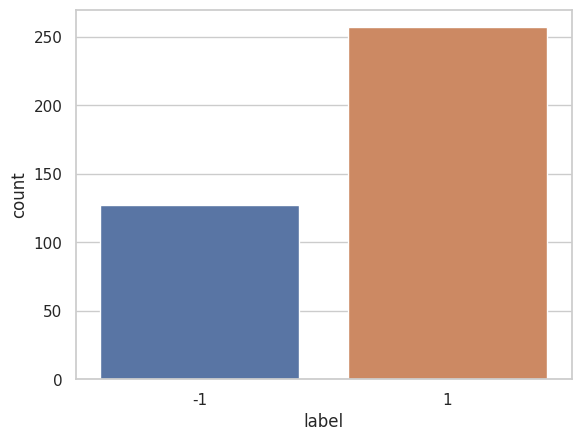

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
sns.countplot(x='label', data=df)

## Tokenization

In [ ]:
import nltk
nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
from nltk.tokenize import word_tokenize


# Tokenizing Text
df['Text_token'] = df['Text'].apply(lambda x: word_tokenize(x))
df[["Text", "Text_token"]].head()

,Text,Text_token
0,alert england uk scraps all covid restrictions...,"[alert, england, uk, scraps, all, covid, restr..."
1,the pandemic was essential to introducing the ...,"[the, pandemic, was, essential, to, introducin..."
2,bayern forward muller tests positive for covid...,"[bayern, forward, muller, tests, positive, for..."
3,sky dvr bilked thebrink tnirishlass on the bri...,"[sky, dvr, bilked, thebrink, tnirishlass, on, ..."
4,lol an issue not incompetence n w t gov t says...,"[lol, an, issue, not, incompetence, n, w, t, g..."


## Stop Words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['Text_token'] = df['Text_token'].apply(lambda x: [w for w in x if not w in stop_words])


In [ ]:
df[["Text", "Text_token"]].head()

,Text,Text_token
0,alert england uk scraps all covid restrictions...,"[alert, england, uk, scraps, covid, restrictio..."
1,the pandemic was essential to introducing the ...,"[pandemic, essential, introducing, metaverse, ..."
2,bayern forward muller tests positive for covid...,"[bayern, forward, muller, tests, positive, cov..."
3,sky dvr bilked thebrink tnirishlass on the bri...,"[sky, dvr, bilked, thebrink, tnirishlass, brig..."
4,lol an issue not incompetence n w t gov t says...,"[lol, issue, incompetence, n, w, gov, says, is..."


## Stemming

In [ ]:
!pip install sastrawi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.7 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Stemming judul
df['Text_token'] = df['Text_token'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/384 [00:00<?, ?it/s]

In [ ]:
# Hasil stemming judul
df[["Text", "Text_token"]].head()

,Text,Text_token
0,alert england uk scraps all covid restrictions...,"[alert, england, uk, scraps, covid, restrictio..."
1,the pandemic was essential to introducing the ...,"[pandemic, essential, introducing, metaverse, ..."
2,bayern forward muller tests positive for covid...,"[bayern, forward, muller, tests, positive, cov..."
3,sky dvr bilked thebrink tnirishlass on the bri...,"[sky, dvr, bilked, thebrink, tnirishlass, brig..."
4,lol an issue not incompetence n w t gov t says...,"[lol, issue, incompetence, n, w, gov, says, is..."


# Export Cleaned Data

In [ ]:
df

,Unnamed: 0,Datetime,Tweet Id,Text,Username,label,Text_token
0,0,2022-02-21 23:59:59+00:00,1495911210067558403,alert england uk scraps all covid restrictions...,worisgo global,1,"[alert, england, uk, scraps, covid, restrictio..."
1,1,2022-02-21 23:59:59+00:00,1495911209106907139,the pandemic was essential to introducing the ...,jeffkav,1,"[pandemic, essential, introducing, metaverse, ..."
2,2,2022-02-21 23:59:58+00:00,1495911205545914369,bayern forward muller tests positive for covid...,iscorers,1,"[bayern, forward, muller, tests, positive, cov..."
3,7,2022-02-21 23:59:52+00:00,1495911177356029966,sky dvr bilked thebrink tnirishlass on the bri...,sexton cecilia,1,"[sky, dvr, bilked, thebrink, tnirishlass, brig..."
4,9,2022-02-21 23:59:46+00:00,1495911152643198976,lol an issue not incompetence n w t gov t says...,arlenehache,1,"[lol, issue, incompetence, n, w, gov, says, is..."
...,...,...,...,...,...,...,...
379,954,2022-02-21 23:31:17+00:00,1495903987723386881,ggreenwald just wondered what you thought of t...,ripdajuulz,-1,"[ggreenwald, wondered, thought, trudeaus, appr..."
380,958,2022-02-21 23:31:06+00:00,1495903939128180742,since the start of the pandemic americans have...,covid scale,-1,"[since, start, pandemic, americans, died, covi..."
381,965,2022-02-21 23:30:56+00:00,1495903899336777733,mc kenna develbiss wants people to know that c...,lenaweepanian,-1,"[mc, kenna, develbiss, wants, people, know, co..."
382,970,2022-02-21 23:30:48+00:00,1495903864750411777,the nih continues to illegally withhold and re...,johnstonshow,-1,"[nih, continues, illegally, withhold, redact, ..."


In [ ]:
df['Text_token'] = df['Text_token'].apply(lambda x: ' '.join(x))


df.to_csv('cleaned-data-covid.csv')

# Clasification

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/axia/cleaned-data-covid.csv', index_col=0)
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,label,Text_token
0,0,2022-02-21 23:59:59+00:00,1495911210067558403,alert england uk scraps all covid restrictions...,worisgo global,1,alert england uk scraps covid restrictions peo...
1,1,2022-02-21 23:59:59+00:00,1495911209106907139,the pandemic was essential to introducing the ...,jeffkav,1,pandemic essential introducing metaverse conce...
2,2,2022-02-21 23:59:58+00:00,1495911205545914369,bayern forward muller tests positive for covid...,iscorers,1,bayern forward muller tests positive covid sec...
3,7,2022-02-21 23:59:52+00:00,1495911177356029966,sky dvr bilked thebrink tnirishlass on the bri...,sexton cecilia,1,sky dvr bilked thebrink tnirishlass bright sid...
4,9,2022-02-21 23:59:46+00:00,1495911152643198976,lol an issue not incompetence n w t gov t says...,arlenehache,1,lol issue incompetence n w gov says issue caus...


In [ ]:
X = df['Text_token']
y = df['label']

## Feature Extracyion

> TF_IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()

count_wm = countvectorizer.fit_transform(X)
tfidf_wm = tfidfvectorizer.fit_transform(X)

In [ ]:
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
df_countvect

Count Vectorizer



,aaf,aaron,aarp,abarrmla,abcnewslive,abfgacggea,able,ableg,abpoli,abruptly,...,zkufmsgds,zokcqhcipk,zoom,zove,zqnshqxn,zsb,zv,zvdlv,zvmqwzvcuf,zysstvixjo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tfidf_wm.shape

(384, 3690)

In [ ]:
# Impor library yang dibutuhkan
from sklearn.decomposition import PCA

# Inisialisasi objek PCA dengan 3 komponen
pca = PCA(n_components=3)

# Melakukan fit transform pada data
X_pca = pca.fit_transform(tfidf_wm.toarray())

In [ ]:
X_pca.shape

(384, 3)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


## Test Size=0,2  || Random State 10 || k3




In [ ]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(X_pca,test_size=0.2, random_state=10)#Nilai X training dan Nilai X testing
training_label, test_label = train_test_split(y, test_size=0.2, random_state=10)#Nilai Y training dan Nilai Y testing

In [ ]:
from sklearn.model_selection import train_test_split

modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array([ 1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1])

In [ ]:
accuracy_score(test_label, test_pred)

0.6103896103896104

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

          -1       0.46      0.39      0.42        28
           1       0.68      0.73      0.71        49

    accuracy                           0.61        77
   macro avg       0.57      0.56      0.56        77
weighted avg       0.60      0.61      0.60        77



## Test Size=0,2  || Random State 10 || k7





In [ ]:
from sklearn.model_selection import train_test_split

modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array([ 1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1, -1,  1])

In [ ]:
accuracy_score(test_label, test_pred)

0.6493506493506493

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

          -1       0.53      0.32      0.40        28
           1       0.68      0.84      0.75        49

    accuracy                           0.65        77
   macro avg       0.61      0.58      0.58        77
weighted avg       0.63      0.65      0.62        77



## Test Size=0,2  || Random State 10 || k14





In [ ]:
from sklearn.model_selection import train_test_split

modelKNN = KNeighborsClassifier(n_neighbors=14)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=14)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array([ 1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1])

In [ ]:
accuracy_score(test_label, test_pred)

0.6623376623376623

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

          -1       0.55      0.43      0.48        28
           1       0.71      0.80      0.75        49

    accuracy                           0.66        77
   macro avg       0.63      0.61      0.61        77
weighted avg       0.65      0.66      0.65        77



## Test Size=0,3  || Random State 22 || k3





In [ ]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(X_pca,test_size=0.3, random_state=22)#Nilai X training dan Nilai X testing
training_label, test_label = train_test_split(y, test_size=0.3, random_state=22)#Nilai Y training dan Nilai Y testing

In [ ]:
from sklearn.model_selection import train_test_split

modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array([-1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
accuracy_score(test_label, test_pred)

0.6637931034482759

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

          -1       0.60      0.40      0.48        45
           1       0.69      0.83      0.75        71

    accuracy                           0.66       116
   macro avg       0.64      0.62      0.62       116
weighted avg       0.65      0.66      0.65       116



## Test Size=0,3  || Random State 22 || k7





In [ ]:
from sklearn.model_selection import train_test_split

modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array([ 1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
accuracy_score(test_label, test_pred)

0.6637931034482759

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

          -1       0.65      0.29      0.40        45
           1       0.67      0.90      0.77        71

    accuracy                           0.66       116
   macro avg       0.66      0.60      0.58       116
weighted avg       0.66      0.66      0.62       116



## Test Size=0,3  || Random State 22 || k14





In [ ]:
from sklearn.model_selection import train_test_split

modelKNN = KNeighborsClassifier(n_neighbors=14)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=14)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array([-1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1])

In [ ]:
accuracy_score(test_label, test_pred)


0.6379310344827587

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

          -1       0.57      0.27      0.36        45
           1       0.65      0.87      0.75        71

    accuracy                           0.64       116
   macro avg       0.61      0.57      0.56       116
weighted avg       0.62      0.64      0.60       116



## Test Size=0,5  || Random State 42 || k3





In [ ]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(X_pca,test_size=0.5, random_state=42)#Nilai X training dan Nilai X testing
training_label, test_label = train_test_split(y, test_size=0.5, random_state=42)#Nilai Y training dan Nilai Y testing

In [ ]:
from sklearn.model_selection import train_test_split

modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1, -1,  1])

In [ ]:
accuracy_score(test_label, test_pred)


0.65625

In [ ]:
print(classification_report(test_label, test_pred))


              precision    recall  f1-score   support

          -1       0.46      0.43      0.44        61
           1       0.74      0.76      0.75       131

    accuracy                           0.66       192
   macro avg       0.60      0.59      0.60       192
weighted avg       0.65      0.66      0.65       192



## Test Size=0,5  || Random State 42 || k7









In [ ]:
from sklearn.model_selection import train_test_split

modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array([-1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1,
       -1,  1,  1, -1,  1])

In [ ]:
accuracy_score(test_label, test_pred)


0.6875

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

          -1       0.51      0.39      0.44        61
           1       0.74      0.82      0.78       131

    accuracy                           0.69       192
   macro avg       0.63      0.61      0.61       192
weighted avg       0.67      0.69      0.68       192



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Print the overall metrics
print('Accuracy score : ', accuracy_score(test_label, test_pred))
print('Precision score : ', precision_score(test_label, test_pred, average='weighted'))
print('Recall score : ', recall_score(test_label, test_pred, average='weighted'))
print('F1 score : ', f1_score(test_label, test_pred, average='weighted'))

Accuracy score :  0.6875
Precision score :  0.6704236977256053
Recall score :  0.6875
F1 score :  0.6751710950080514


## Test Size=0,5  || Random State 42 || k14









In [ ]:
from sklearn.model_selection import train_test_split

modelKNN = KNeighborsClassifier(n_neighbors=14)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=14)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array([ 1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1, -1,  1])

In [ ]:
accuracy_score(test_label, test_pred)


0.6822916666666666

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

          -1       0.50      0.33      0.40        61
           1       0.73      0.85      0.78       131

    accuracy                           0.68       192
   macro avg       0.62      0.59      0.59       192
weighted avg       0.66      0.68      0.66       192

